In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
data = pd.read_csv(r'C:\Users\Spencer\Environments\aquastaat\cse6242fall2019team102\data\table\imputed_ridge_combined_WSI.csv')

In [49]:
WSI = 'SDG 6.4.2. Water Stress'
future = pd.read_csv(r'C:\Users\Spencer\Environments\aquastaat\cse6242fall2019team102\data\Forecast\output_gdp0_pop0.csv')
future = future.loc[:, ['YearBin', WSI]]
future = future.loc[future.loc[:,'YearBin'].isin(['2020', '2025', '2030']),:]
future

,YearBin,SDG 6.4.2. Water Stress
8,2020,29.126359
9,2025,40.612635
10,2030,66.430181
19,2020,6.996400
20,2025,6.951819
21,2030,6.678343
30,2020,167.359900
31,2025,185.629473
32,2030,354.575246
41,2020,81.616547


In [54]:
data = data.loc[:, ['Area', '1980', '1985', '1990', '1995', '2000',
       '2005', '2010', '2015']]
data = pd.melt(data, id_vars='Area', value_vars=['1980', '1985', '1990', '1995', '2000',
    '2005', '2010', '2015'])
data.head()

,Area,variable,value
0,Armenia,1980,59.010
1,Afghanistan,1980,28.890
2,Albania,1980,7.212
3,Algeria,1980,42.190
4,Angola,1980,1.273


In [68]:
years = pd.concat([data['variable'], future['YearBin']])
values = pd.concat([data['value'], future[WSI]])

In [69]:
future[WSI].shape

(438,)

Text(0,0.5,'WSI')

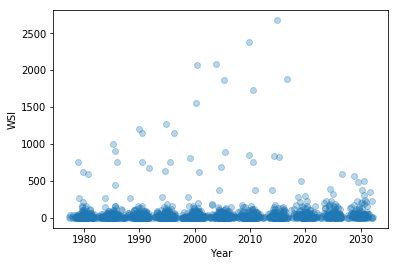

In [76]:
perturb = np.random.normal(0, 1, len(values))
plt.scatter(years.astype(float) + perturb, values, alpha=.3)
plt.xlabel("Year")
plt.ylabel("WSI")
# plt.title("WSI")